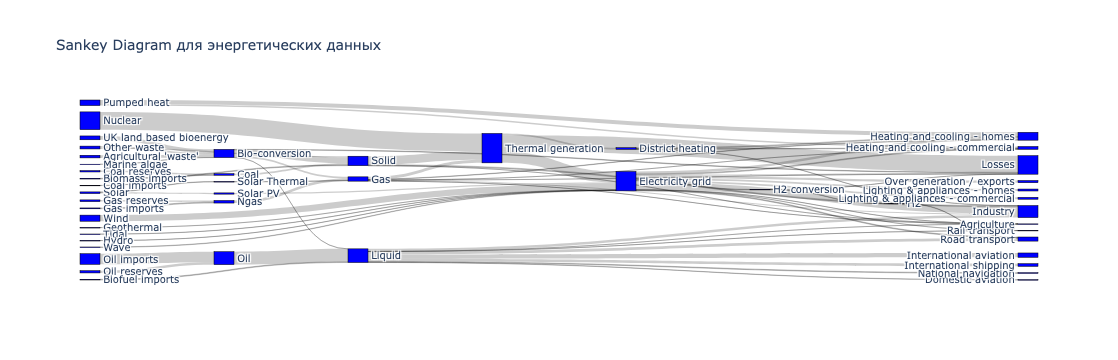

                 source          target    value
0  Agricultural 'waste'  Bio-conversion  124.729
1        Bio-conversion          Liquid    0.597
2        Bio-conversion          Losses   26.862
3        Bio-conversion           Solid  280.322
4        Bio-conversion             Gas   81.144

Статистика значений:
count     68.000000
mean     115.535706
std      177.225237
min        0.129000
25%       17.874250
50%       52.583500
75%      121.537500
max      839.978000
Name: value, dtype: float64

Уникальные источники:
["Agricultural 'waste'" 'Bio-conversion' 'Biofuel imports'
 'Biomass imports' 'Coal imports' 'Coal reserves' 'Coal'
 'District heating' 'Electricity grid' 'Gas imports' 'Gas reserves' 'Gas'
 'Geothermal' 'H2 conversion' 'H2' 'Hydro' 'Liquid' 'Marine algae' 'Ngas'
 'Nuclear' 'Oil imports' 'Oil reserves' 'Oil' 'Other waste' 'Pumped heat'
 'Solar PV' 'Solar Thermal' 'Solar' 'Solid' 'Thermal generation' 'Tidal'
 'UK land based bioenergy' 'Wave' 'Wind']

Уникальные цели:
['

In [17]:
import pandas as pd
import plotly.graph_objects as go

# Загрузка данных с GitHub
url = "https://raw.githubusercontent.com/tiposasha/dataset/refs/heads/main/energy.csv"
df = pd.read_csv(url)


# Создание списков источников, целей и значений
source = df['source'].tolist()
target = df['target'].tolist()
value = df['value'].tolist()


# Создание уникального списка узлов
all_nodes = source + target
unique_nodes = list(set(all_nodes))


# Создание словаря для маппинга названий узлов на их индексы
node_indices = {node: index for index, node in enumerate(unique_nodes)}


# Создание числовых списков источников и целей
source_indices = [node_indices[node] for node in source]
target_indices = [node_indices[node] for node in target]



# Создание Sankey диаграммы
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = unique_nodes,
      color = "blue"
    ),
    link = dict(
      source = source_indices,
      target = target_indices,
      value = value
  ))])

# Настройка макета
fig.update_layout(title_text="Sankey Diagram для энергетических данных", font_size=10)

# Отображение диаграммы
fig.show()

# Вывод первых нескольких строк данных для проверки
print(df.head())

# Вывод статистики
print("\nСтатистика значений:")
print(df['value'].describe())

print("\nУникальные источники:")
print(df['source'].unique())

print("\nУникальные цели:")
print(df['target'].unique())

In [2]:
import pandas as pd
import plotly.graph_objects as go
import random

# Функция для генерации случайного цвета
def random_color():
    return f'rgb({random.randint(0, 255)}, {random.randint(0, 255)}, {random.randint(0, 255)})'

# Загрузка данных с GitHub
url = "https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.csv"
df = pd.read_csv(url)

# Создание списков источников, целей и значений
source = df['source'].tolist()
target = df['target'].tolist()
value = df['value'].tolist()

# Создание уникального списка узлов
all_nodes = source + target
unique_nodes = list(set(all_nodes))

# Создание словаря для маппинга названий узлов на их индексы
node_indices = {node: index for index, node in enumerate(unique_nodes)}

# Создание числовых списков источников и целей
source_indices = [node_indices[node] for node in source]
target_indices = [node_indices[node] for node in target]

# Создание цветов для узлов
node_colors = [random_color() for _ in unique_nodes]

# Создание цветов для связей
link_colors = [node_colors[source_indices[i]] for i in range(len(source_indices))]

# Создание Sankey диаграммы
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = unique_nodes,
      color = node_colors
    ),
    link = dict(
      source = source_indices,
      target = target_indices,
      value = value,
      color = link_colors
  ))])

# Настройка макета
fig.update_layout(
    title_text="Цветная Sankey диаграмма для энергетических данных",
    font_size=10,
    plot_bgcolor='rgba(0,0,0,0)',  # Прозрачный фон
)

# Отображение диаграммы
fig.show()

# Вывод первых нескольких строк данных для проверки
print(df.head())

# Анализ структуры данных
print("\nСтруктура связей:")
for s, t, v in zip(source, target, value):
    print(f"{s} -> {t}: {v}")

# Вывод статистики
print("\nСтатистика значений:")
print(df['value'].describe())

print("\nУникальные источники:")
print(df['source'].unique())

print("\nУникальные цели:")
print(df['target'].unique())

# Анализ вложенных цепочек
print("\nАнализ вложенных цепочек:")
for node in unique_nodes:
    outgoing = df[df['source'] == node]
    if len(outgoing) > 1:
        print(f"\nУзел '{node}' имеет несколько исходящих связей:")
        for _, row in outgoing.iterrows():
            print(f"  -> {row['target']}: {row['value']}")

HTTPError: HTTP Error 404: Not Found